In [358]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [322]:
# Read the 'fraudTest.csv' file and store its contents in the 'df_test' DataFrame
df_test = pd.read_csv('fraudTest.csv')

# Read the 'fraudTrain.csv' file and store its contents in the 'df_train' DataFrame
df_train = pd.read_csv('fraudTrain.csv')

# Preprocessing

In [323]:
# Concatenate two DataFrames, 'df_train' and 'df_test', to combine their data.
# The 'ignore_index=True' parameter resets the index to create a continuous index for the new DataFrame 'df'.
df = pd.concat([df_train, df_test], ignore_index=True) #Merging both the datasets to do preprocessing, we can shuffle and split the data at later  stage

In [324]:
# Retrieve and display the shape (number of rows and columns) of the combined 'df' DataFrame.
# The result is a tuple representing the shape.
df_test.shape , df_train.shape , df.shape #verifying the record counts

((555719, 23), (1296675, 23), (1852394, 23))

In [325]:
# Remove the column named 'Unnamed: 0' from the DataFrame 'df'.
# The 'inplace=True' parameter modifies the 'df' DataFrame in place.
df.drop(columns=['Unnamed: 0'], inplace=True) # Dropping this column since pandas creates indexing by default

In [326]:
# Define a dictionary 'new_column_names' that maps old column names to new column names.
# This will be used for renaming the columns in the DataFrame.
new_column_names = {
    'trans_date_trans_time': 'transaction_snapshot',
    'cc_num': 'credit_card_number',
    'merchant': 'merchant_name',
    'amt': 'amount',
    'first': 'first_name',
    'last': 'last_name',
    'lat': 'latitude',
    'long': 'longitude',
    'city_pop': 'city_population',
    'dob': 'date_of_birth',
    'trans_num': 'transaction_number',
    'merch_lat': 'merchant_latitude',
    'merch_long': 'merchant_longitude',
}

# Rename the DataFrame columns according to the 'new_column_names' mapping.
# The 'inplace=True' parameter modifies the DataFrame 'df' in place.
df.rename(columns=new_column_names, inplace=True)


In [327]:
#Summary statistics
df.describe()

,credit_card_number,amount,zip,latitude,longitude,city_population,unix_time,merchant_latitude,merchant_longitude,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


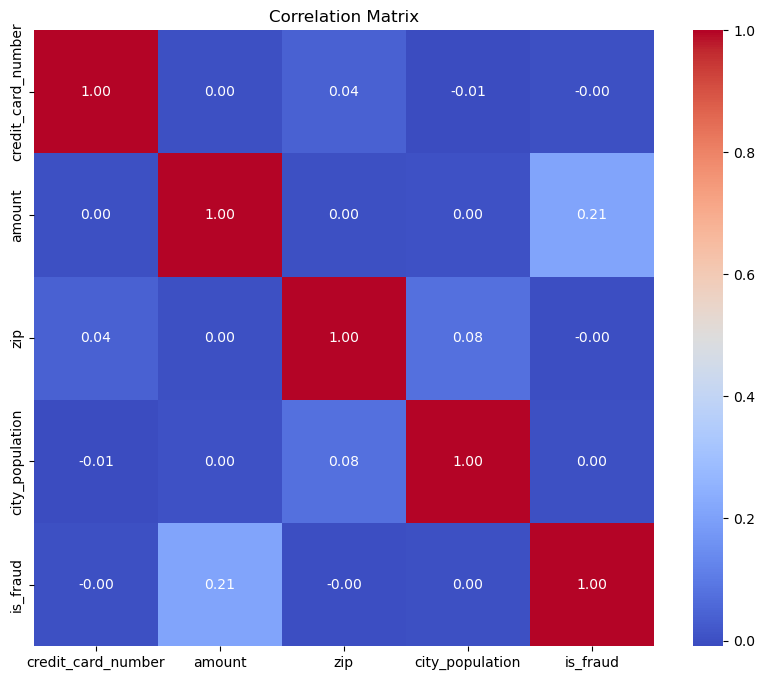

In [330]:
correlation_matrix = df[['credit_card_number','amount','zip','city_population','is_fraud']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [130]:
# Check for missing (null) values in each column of the DataFrame 'df'.
# The 'isnull()' function returns a DataFrame of the same shape as 'df' with True for missing values and False for non-missing values.

# Calculate and display the sum of missing values in each column.
# The result is a Series where each value represents the count of missing values in the corresponding column.


df.isnull().sum()  #These ensures that there are no NULL or missing values in our dataset

transaction_snapshot    0
credit_card_number      0
merchant_name           0
category                0
amount                  0
first_name              0
last_name               0
gender                  0
street                  0
city                    0
state                   0
zip                     0
latitude                0
longitude               0
city_population         0
job                     0
date_of_birth           0
transaction_number      0
unix_time               0
merchant_latitude       0
merchant_longitude      0
is_fraud                0
dtype: int64

In [131]:
#Check for duplicates
df[df.duplicated(subset=['transaction_number'], keep=False)] 
#each value in column transaction_number is unique

,transaction_snapshot,credit_card_number,merchant_name,category,amount,first_name,last_name,gender,street,city,...,latitude,longitude,city_population,job,date_of_birth,transaction_number,unix_time,merchant_latitude,merchant_longitude,is_fraud


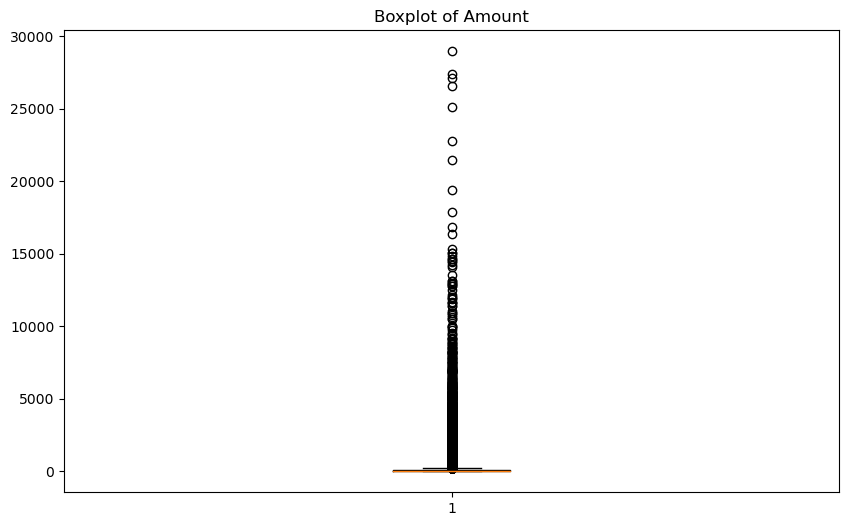

In [132]:
#Checking for outliers in amount
plt.figure(figsize=(10, 6)) 
x1 = df['amount']
plt.boxplot(x1)
plt.title('Boxplot of Amount')
plt.show()

# Feature Engineering

In [133]:
#creating new feature called age based on date_of_birth , reference age as of 2023/01/01
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
reference_date = pd.to_datetime('2023-01-01')
df['age'] = (reference_date - df['date_of_birth']).astype('<m8[Y]')
df['age'] = df['age'].astype(int)

In [134]:
# Apply one-hot encoding to the 'gender' column
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, gender_dummies], axis=1)



In [135]:
# Define a function to classify credit card numbers
def classify_credit_card(number):
    number_str = str(number)
    if number_str.startswith('3'):
        return 'American Express'
    elif number_str.startswith('4'):
        return 'Visa'
    elif number_str.startswith(('2', '5')):
        return 'Mastercard'
    elif number_str.startswith('6'):
        return 'Discover'
    else:
        return 'Other'

In [136]:
# Create a new column 'card_type' in the DataFrame 'df' to store the results of card type classification.
# This column will contain the card types assigned to each credit card number based on the 'classify_credit_card' function.

# Use the 'apply' method to apply the 'classify_credit_card' function to each credit card number in the 'credit_card_number' column.
# The results of this function will be stored in the 'card_type' column for each corresponding row.

df['card_type'] = df['credit_card_number'].apply(classify_credit_card)

In [137]:
label_encoder = LabelEncoder()
df['card_type_encoded']= label_encoder.fit_transform(df['card_type'])

In [138]:
# Display the first 5 rows of the DataFrame 'df' to provide a quick overview of its data.
df.head(5)

,transaction_snapshot,credit_card_number,merchant_name,category,amount,first_name,last_name,gender,street,city,...,transaction_number,unix_time,merchant_latitude,merchant_longitude,is_fraud,age,gender_F,gender_M,card_type,card_type_encoded
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34,1,0,Mastercard,2
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,1,0,Discover,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60,0,1,American Express,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55,0,1,American Express,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36,0,1,American Express,0


In [139]:
# Retrieve and display the column names (headers) of the DataFrame 'df'.
df.columns

Index(['transaction_snapshot', 'credit_card_number', 'merchant_name',
       'category', 'amount', 'first_name', 'last_name', 'gender', 'street',
       'city', 'state', 'zip', 'latitude', 'longitude', 'city_population',
       'job', 'date_of_birth', 'transaction_number', 'unix_time',
       'merchant_latitude', 'merchant_longitude', 'is_fraud', 'age',
       'gender_F', 'gender_M', 'card_type', 'card_type_encoded'],
      dtype='object')

In [140]:
# Select only 'amount' and 'city_pop' columns
selected_columns = ['amount', 'city_population']
X = df[selected_columns]

In [141]:
# Scale the selected features using StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [142]:
# Create a DataFrame for the standard scaled features
scaled_columns = pd.DataFrame(X_standard, columns=['standard_scaled_amount', 'standard_scaled_city_pop'])

In [143]:
# Concatenate the scaled columns with the original DataFrame
df = pd.concat([df, scaled_columns], axis=1)

In [144]:
# Apply Min-Max scaling to the selected features
scaler = MinMaxScaler()
X_min_max = scaler.fit_transform(X)

In [145]:
# Create a DataFrame for the min max scaled features
scaled_columns = pd.DataFrame(X_min_max, columns=['min_max_scaled_amount', 'min_max_scaled_city_pop'])

In [146]:
# Concatenate the scaled columns with the original DataFrame
df = pd.concat([df, scaled_columns], axis=1)

In [147]:
# Display the first 5 rows of the updated DataFrame
df.head(5)

,transaction_snapshot,credit_card_number,merchant_name,category,amount,first_name,last_name,gender,street,city,...,is_fraud,age,gender_F,gender_M,card_type,card_type_encoded,standard_scaled_amount,standard_scaled_city_pop,min_max_scaled_amount,min_max_scaled_city_pop
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,34,1,0,Mastercard,2,-0.408741,-0.282429,0.000137,0.001194
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,44,1,0,Discover,1,0.233378,-0.293527,0.003670,0.000043
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,60,0,1,American Express,0,0.942184,-0.280243,0.007569,0.001421
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,55,0,1,American Express,0,-0.157381,-0.287590,0.001520,0.000659
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,36,0,1,American Express,0,-0.176470,-0.293693,0.001415,0.000026


In [148]:
df.columns

Index(['transaction_snapshot', 'credit_card_number', 'merchant_name',
       'category', 'amount', 'first_name', 'last_name', 'gender', 'street',
       'city', 'state', 'zip', 'latitude', 'longitude', 'city_population',
       'job', 'date_of_birth', 'transaction_number', 'unix_time',
       'merchant_latitude', 'merchant_longitude', 'is_fraud', 'age',
       'gender_F', 'gender_M', 'card_type', 'card_type_encoded',
       'standard_scaled_amount', 'standard_scaled_city_pop',
       'min_max_scaled_amount', 'min_max_scaled_city_pop'],
      dtype='object')

# EDA

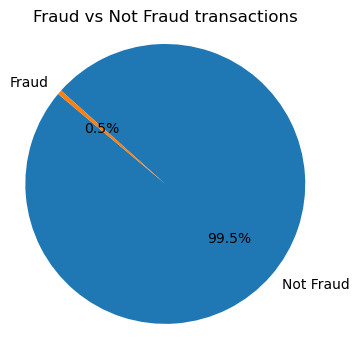

In [149]:
labels=["Not Fraud","Fraud"]
fraud_or_not = df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
plt.figure(figsize=(4, 4))  # Set the figure size (optional)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140) 
plt.axis('equal') 
plt.title('Fraud vs Not Fraud transactions')
plt.show()

In [150]:
df_fraud = df[df['is_fraud'] == 1]
df_fraud.shape

(9651, 31)

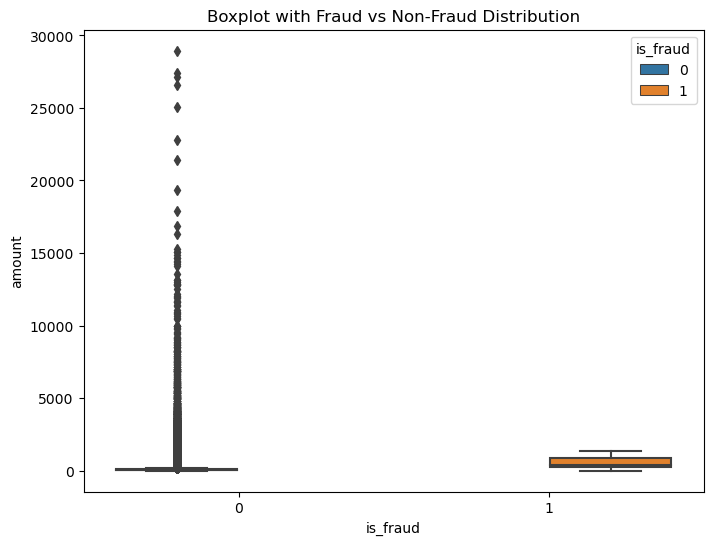

In [151]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.boxplot(x='is_fraud', y='amount', data=df, hue='is_fraud')
plt.title('Boxplot with Fraud vs Non-Fraud Distribution')
plt.show()

In [152]:
df_before_outliers_removal = df

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned
df_after_remove_outliers = remove_outliers_iqr(df_before_outliers_removal, 'amount')

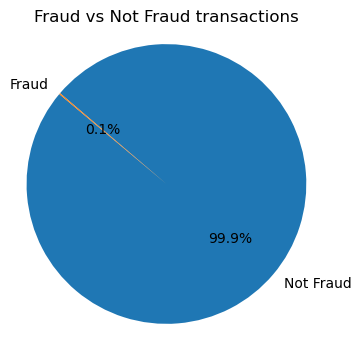

In [153]:
labels=["Not Fraud","Fraud"]
fraud_or_not = df_after_remove_outliers["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
plt.figure(figsize=(4, 4))  # Set the figure size (optional)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140) 
plt.axis('equal') 
plt.title('Fraud vs Not Fraud transactions')
plt.show()

Text(0.5, 1.0, 'Distribution of Fraud by Age')

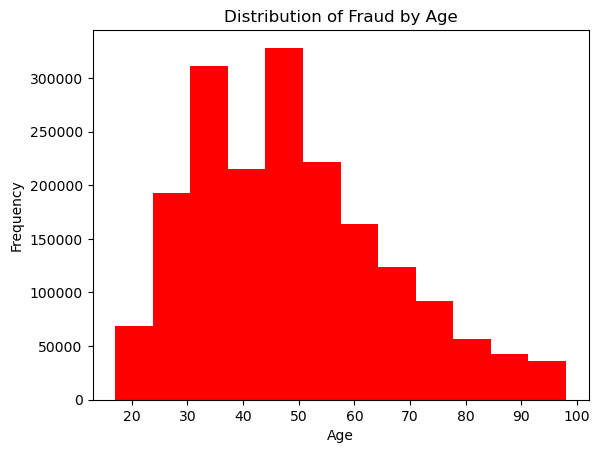

In [154]:
plt.hist(df['age'], bins = 12, color = 'r')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Distribution of Fraud by Age') 

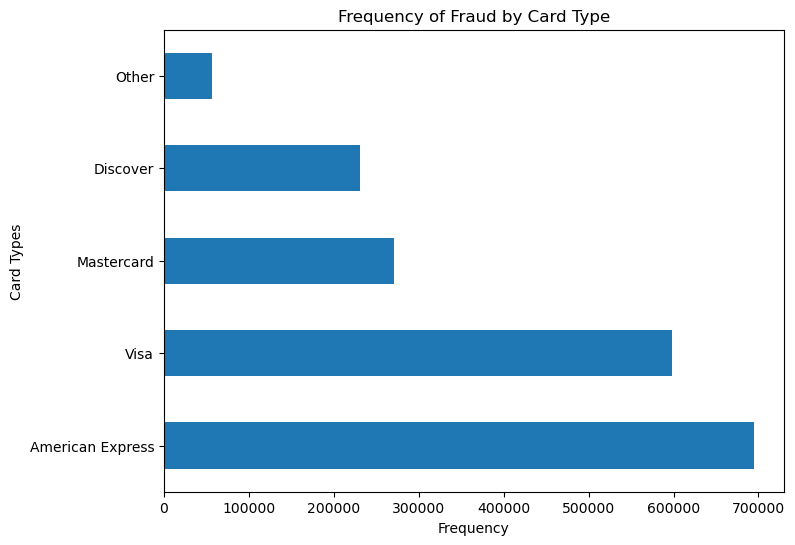

In [103]:
data = df['card_type'].value_counts()
plt.figure(figsize=(8, 6)) 
data.plot(kind='barh') 
plt.xlabel('Frequency')  
plt.ylabel('Card Types')  
plt.title('Frequency of Fraud by Card Type') 
plt.show()

In [155]:
# Data Splitting
X_standard = df[['standard_scaled_amount', 'standard_scaled_city_pop','gender_F','gender_M','age','card_type_encoded']]
y_standard = df['is_fraud']

X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, test_size=0.3, random_state=2)
print(np.mean(y_train_standard), np.mean(y_standard))


X_min_max = df[['min_max_scaled_amount', 'min_max_scaled_city_pop','gender_F','gender_M','age','card_type_encoded']]
y_min_max = df['is_fraud']

X_train_min_max, X_test_min_max, y_train_min_max, y_test_min_max = train_test_split(X_min_max, y_min_max, test_size=0.3, random_state=2)
print(np.mean(y_train_standard), np.mean(y_standard))

0.005210249291456996 0.005210014716091717
0.005210249291456996 0.005210014716091717


# Modeling



### Logistic Regression

In [168]:
# Running Logistic Regression for data normalised using standard scalar:
logreg_standard = LogisticRegression()
logreg_standard.fit(X_train_standard, y_train_standard)
print(logreg_standard.coef_, logreg_standard.intercept_)
y_test_pred_logreg_standard = logreg_standard.predict(X_test_standard)

[[ 3.96887105e-01  6.33471414e-03 -2.05040648e+00 -1.88188208e+00
   9.85944747e-03  6.33369181e-04]] [-3.9353592]


In [170]:
# Calculate and display the confusion matrix for Logistic Regression with standard scaling
confusion_matrix(y_test_standard,y_test_pred_logreg_standard)

array([[552556,    268],
       [  2895,      0]])

In [171]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with standard scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_standard, y_test_pred_logreg_standard))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_standard, y_test_pred_logreg_standard))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_standard, y_test_pred_logreg_standard))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_standard, y_test_pred_logreg_standard))

Precision score for Logistic Regression with standard scaling: 0.0
Recall score for Logistic Regression with standard scaling: 0.0
Accuracy score for Logistic Regression with standard scaling: 0.9943082745056404
F1 score for Logistic Regression with standard scaling: 0.0


In [169]:
# Running Logistic Regression for data normalised using minmax scalar:
logreg_min_max = LogisticRegression()
logreg_min_max.fit(X_train_min_max, y_train_min_max)
print(logreg_min_max.coef_, logreg_min_max.intercept_)
y_test_pred_logreg_min_max = logreg_min_max.predict(X_test_min_max)

[[ 4.20519853e+01  1.13272818e-01 -1.53546665e+00 -1.37486099e+00
   9.02823786e-03  1.15499781e-03]] [-4.40854325]


In [172]:
# Calculate and display the confusion matrix for Logistic Regression with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_logreg_min_max)

array([[552719,    105],
       [  2895,      0]])

In [341]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with min-max scaling
print('Precision score for Logistic Regression with min max scaling:', precision_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Recall score for Logistic Regression with min max scaling:', recall_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Accuracy score for Logistic Regression with min max scaling:', accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))
print('F1 score for Logistic Regression with min max scaling:', f1_score(y_test_min_max, y_test_pred_logreg_min_max))

Precision score for Logistic Regression with min max scaling: 0.08287583665488456
Recall score for Logistic Regression with min max scaling: 0.7613126079447323
Accuracy score for Logistic Regression with min max scaling: 0.9548674779879759
F1 score for Logistic Regression with min max scaling: 0.1494794669198684


### SMOTE (Synthetic Minority Oversampling Technique)

In [176]:
method= SMOTE()
X_train_standard, y_train_standard = method.fit_resample(X_train_standard, y_train_standard)
X_train_min_max, y_train_min_max = method.fit_resample(X_train_min_max, y_train_min_max)

### Logistic Regression (after SMOTE)

In [177]:
# Running Logistic Regression for data normalised using standard scalar:
logreg_standard = LogisticRegression()
logreg_standard.fit(X_train_standard, y_train_standard)
print(logreg_standard.coef_, logreg_standard.intercept_)
y_test_pred_logreg_standard = logreg_standard.predict(X_test_standard)

[[ 1.25824437e+00 -7.94354381e-02 -7.70581400e+00 -7.82038207e+00
   4.04859947e-03 -2.83277833e-02]] [6.61047294]


In [178]:
# Calculate and display the confusion matrix for Logistic Regression with standard scaling
confusion_matrix(y_test_standard,y_test_pred_logreg_standard)

array([[527345,  25479],
       [   691,   2204]])

In [179]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with standard scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_standard, y_test_pred_logreg_standard))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_standard, y_test_pred_logreg_standard))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_standard, y_test_pred_logreg_standard))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_standard, y_test_pred_logreg_standard))

Precision score for Logistic Regression with standard scaling: 0.07961564859299931
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.9529078545092033
F1 score for Logistic Regression with standard scaling: 0.1441559290993525


In [180]:
# Running Logistic Regression for data normalised using minmax scalar:
logreg_min_max = LogisticRegression()
logreg_min_max.fit(X_train_min_max, y_train_min_max)
print(logreg_min_max.coef_, logreg_min_max.intercept_)
y_test_pred_logreg_min_max = logreg_min_max.predict(X_test_min_max)

[[ 2.28168313e+02 -6.20898268e-01 -3.73485749e+00 -3.86930459e+00
   3.86915169e-03 -1.18790041e-02]] [2.07406016]


In [181]:
# Calculate and display the confusion matrix for Logistic Regression with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_logreg_min_max)

array([[528434,  24390],
       [   691,   2204]])

In [182]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with min-max scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_min_max, y_test_pred_logreg_min_max))

Precision score for Logistic Regression with standard scaling: 0.08287583665488456
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.9548674779879759
F1 score for Logistic Regression with standard scaling: 0.1494794669198684


### KNN

In [184]:
# knn_standard = KNeighborsClassifier()
#param_knn = {'n_neighbors': range(3, 26, 2)}
#grid_knn = GridSearchCV(knn, param_knn, cv = 5)
#grid_knn.fit(X_train_standard, y_train_standard)
#print(grid_knn.best_params_)

In [185]:
# Run the KNN Model for data normalised using standard scalar:
knn_standard = KNeighborsClassifier(n_neighbors = 13)
knn_standard.fit(X_train_standard, y_train_standard)
print(knn_standard.score(X_test_standard, y_test_standard))
y_test_pred_knn_standard = knn_standard.predict(X_test_standard)

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.9582018970019021


/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [186]:
#knn = KNeighborsClassifier()
#param_knn = {'n_neighbors': range(3, 26, 2)}
#grid_knn = GridSearchCV(knn, param_knn, cv = 5)
#grid_knn.fit(X_train_min_max, y_train_min_max)
#print(grid_knn.best_params_)

In [187]:
# Run the KNN Model for data normalised using minmax scalar:
knn_min_max = KNeighborsClassifier(n_neighbors = 13)
knn_min_max.fit(X_train_min_max, y_train_min_max)
print(knn_min_max.score(X_test_min_max, y_test_min_max))
y_test_pred_knn_min_max = knn_min_max.predict(X_test_min_max)

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.9471837385441203


/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



### Decision Tree

In [140]:
# opt_tree = DecisionTreeClassifier(random_state = 0)

# dt_params = {'max_depth':  range(1,5)         , # max_depth is too high
# 'min_samples_split':   range(50,300,50), # too low 50,100, 200, ...
# 'max_leaf_nodes':    range(2,11)   }

# grid_tree = GridSearchCV(opt_tree, dt_params)
# grid_tree.fit(X_test_standard, y_test_standard)
# grid_tree.best_params_

{'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_split': 50}

In [190]:
# Run the Decision Tree Classifier Model for data normalised using standard scalar:
dtc_standard = DecisionTreeClassifier(random_state=0,max_depth= 4, max_leaf_nodes= 9, min_samples_split= 50)
dtc_standard.fit(X_train_standard,y_train_standard)
print("Accuracy is:", dtc_standard.score(X_test_standard,y_test_standard))
y_test_pred_dtc_standard = dtc_standard.predict(X_test_standard)

Accuracy is: 0.8813717004457289


In [142]:
#opt_tree = DecisionTreeClassifier(random_state = 0)

#dt_params = {'max_depth':  range(1,5)         , # max_depth is too high
#'min_samples_split':   range(50,300,50), # too low 50,100, 200, ...
#              'max_leaf_nodes':    range(2,11)   }

# grid_tree = GridSearchCV(opt_tree, dt_params)
# grid_tree.fit(X_test_min_max, y_test_min_max)
# grid_tree.best_params_

In [191]:
# Run the Decision Tree Classifier Model for data normalised using minmax scalar:
dtc_min_max = DecisionTreeClassifier(random_state=0,max_depth= 4, max_leaf_nodes= 9, min_samples_split= 50)
dtc_min_max.fit(X_train_min_max,y_train_min_max)
print("Accuracy is:", dtc_min_max.score(X_test_min_max,y_test_min_max))
y_test_pred_dtc_min_max = dtc_min_max.predict(X_test_min_max)

Accuracy is: 0.9678740514540622


### Random Forest

In [192]:
# Run the Random Forest Classifier Model for data normalised using standard scalar: 
rfc_standard = RandomForestClassifier(random_state=0)
rfc_standard.fit(X_train_standard,y_train_standard)
print("Accuracy is:", rfc_standard.score(X_test_standard,y_test_standard))
y_test_pred_rfc_standard = rfc_standard.predict(X_test_standard)

Accuracy is: 0.9678560567481047


In [193]:
# Run the Random Forest Classifier Model for data normalised using minmax scalar: 
rfc_min_max = RandomForestClassifier(random_state=0)
rfc_min_max.fit(X_train_min_max,y_train_min_max)
print("Accuracy is:", rfc_min_max.score(X_test_min_max,y_test_min_max))
y_test_pred_rfc_min_max = rfc_min_max.predict(X_test_min_max)

Accuracy is: 0.9270728551660101


### Naive Bayes

In [194]:
# Run the Naive Bayes Model for data normalised using standard scalar: 
cat_nb_standard = CategoricalNB(alpha = 0)
cat_nb_standard.fit(X_train_standard,y_train_standard)
print("Accuracy is:", cat_nb_standard.score(X_test_standard,y_test_standard))
y_test_pred_cat_nb_standard = cat_nb_standard.predict(X_test_standard)

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy is: 0.9695709522258551


In [195]:
# Run the Naive Bayes Model for data normalised using minmax scalar: 
cat_nb_min_max = CategoricalNB(alpha = 0)
cat_nb_min_max.fit(X_train_min_max,y_train_min_max)
print("Accuracy is:", cat_nb_min_max.score(X_test_min_max,y_test_min_max))
y_test_pred_cat_nb_min_max = cat_nb_min_max.predict(X_test_min_max)

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



Accuracy is: 0.5986622735591189


### Gaussian Naive Bayes

In [196]:
# Run the Gaussian Naive Bayes Model for data normalised using standard scalar: 
g_nb_standard = GaussianNB()
g_nb_standard.fit(X_train_standard,y_train_standard)
print("Accuracy is:", g_nb_standard.score(X_test_standard,y_test_standard))
y_test_pred_g_nb_standard = g_nb_standard.predict(X_test_standard)

Accuracy is: 0.9787446533229924


In [197]:
# Run the Gaussian Naive Bayes Model for data normalised using minmax scalar: 
g_nb_min_max = GaussianNB()
g_nb_min_max.fit(X_train_min_max,y_train_min_max)
print("Accuracy is:", g_nb_min_max.score(X_test_min_max,y_test_min_max))
y_test_pred_g_nb_min_max = g_nb_min_max.predict(X_test_min_max)

Accuracy is: 0.9785071232043533


### SVM

In [198]:
svc_standard = LinearSVC(random_state = 0)
svc_standard.fit(X_train_standard, y_train_standard)
print("Accuracy is:", svc_standard.score(X_test_standard,y_test_standard))
y_test_pred_svc_standard = svc_standard.predict(X_test_standard)

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy is: 0.3245291235318569


In [199]:
svc_min_max = LinearSVC(random_state = 0) 
svc_min_max.fit(X_train_min_max, y_train_min_max)
print("Accuracy is:", svc_min_max.score(X_test_min_max,y_test_min_max))
y_test_pred_svc_min_max = svc_min_max.predict(X_test_min_max)

Accuracy is: 0.9711077001146263


/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



### Extension - Unsupervised + Supervised

In [200]:
#PCA + Random Forest for data normalised using standard scalar: 

n_components = 2  # Set the number of components you want to keep
pca = PCA(n_components=n_components)
X_train_pca_standard = pca.fit_transform(X_train_standard)
X_test_pca_standard = pca.transform(X_test_standard)

# Train a RandomForest classifier on the reduced data
pca_rfc_standard = RandomForestClassifier(random_state=0)
pca_rfc_standard.fit(X_train_pca_standard, y_train_standard)

# Make predictions on the test data
y_pred_pca_rfc_standard = pca_rfc_standard.predict(X_test_pca_standard)

# Evaluate the model
print("Accuracy is:", pca_rfc_standard.score(X_test_pca_standard,y_test_standard))

Accuracy is: 0.9465053381295223


In [201]:
#PCA + Random Forest for data normalised using min max scalar: 

n_components = 2  # Set the number of components you want to keep
pca = PCA(n_components=n_components)
X_train_pca_min_max = pca.fit_transform(X_train_min_max)
X_test_pca_min_max = pca.transform(X_test_min_max)

# Train a RandomForestNaive Bayes classifier on the reduced data
pca_rfc_min_max = RandomForestClassifier(random_state=0)
pca_rfc_min_max.fit(X_train_pca_min_max, y_train_min_max)

# Make predictions on the test data
y_pred_pca_rfc_min_max = pca_rfc_min_max.predict(X_test_pca_min_max)

# Evaluate the model
print("Accuracy is:", pca_rfc_min_max.score(X_test_pca_min_max,y_test_min_max))

Accuracy is: 0.8846359401064207


# Performance Evaluation

### Logistic Regression

In [202]:
# Calculate and display the confusion matrix for Logistic Regression with standard scaling
confusion_matrix(y_test_standard,y_test_pred_logreg_standard)

array([[527345,  25479],
       [   691,   2204]])

In [203]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with standard scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_standard, y_test_pred_logreg_standard))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_standard, y_test_pred_logreg_standard))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_standard, y_test_pred_logreg_standard))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_standard, y_test_pred_logreg_standard))

Precision score for Logistic Regression with standard scaling: 0.07961564859299931
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.9529078545092033
F1 score for Logistic Regression with standard scaling: 0.1441559290993525


In [291]:
ndf_lr_standard = [(recall_score(y_test_standard, y_test_pred_logreg_standard), precision_score(y_test_standard, y_test_pred_logreg_standard), f1_score(y_test_standard, y_test_pred_logreg_standard), accuracy_score(y_test_standard, y_test_pred_logreg_standard))]
ndf_lr_standard_score = pd.DataFrame(data = ndf_lr_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_lr_standard_score.insert(0, 'Model', 'Logistic Regression Standard')
ndf_lr_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Logistic Regression Standard,0.761313,0.079616,0.144156,0.952908


Text(0, 0.5, 'Precision')

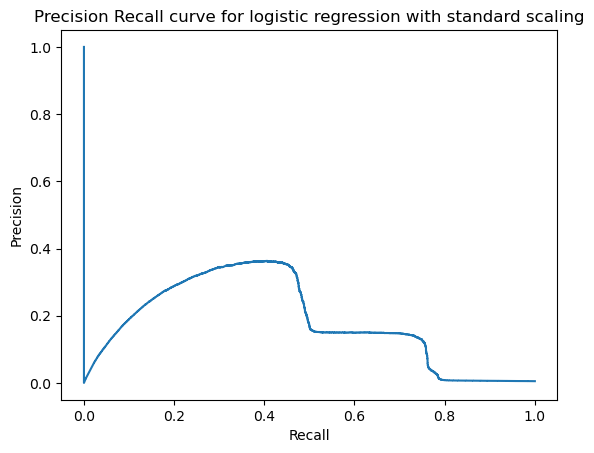

In [204]:
# Calculate precision, recall, and plot the Precision-Recall curve for Logistic Regression with standard scaling
y_pred_proba_logreg_standard = logreg_standard.predict_proba(X_test_standard)[:,1]
logreg_standard.predict_proba(X_test_standard).shape
logreg_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_logreg_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for logistic regression with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [205]:
# Calculate and display the Area Under the Curve (AUC) for Logistic Regression with standard scaling
print("AUC for logistic regression with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_logreg_standard)  )

AUC for logistic regression with standard scaling: 0.8334780411019199


Text(0, 0.5, 'TPR')

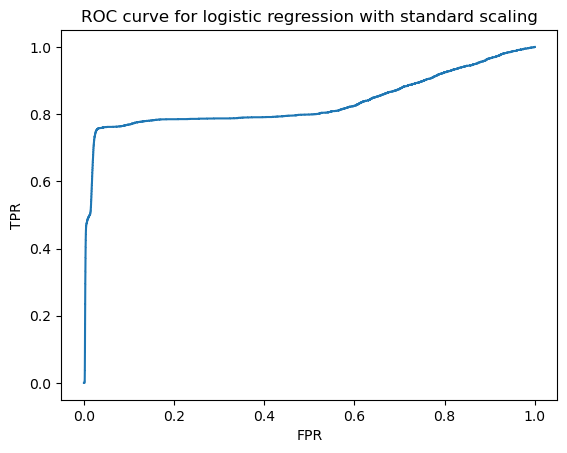

In [206]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for logistic regression with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_logreg_standard)
plt.title('ROC curve for logistic regression with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [207]:
# Calculate and display the confusion matrix for Logistic Regression with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_logreg_min_max)

array([[528434,  24390],
       [   691,   2204]])

In [208]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with min-max scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_min_max, y_test_pred_logreg_min_max))

Precision score for Logistic Regression with standard scaling: 0.08287583665488456
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.9548674779879759
F1 score for Logistic Regression with standard scaling: 0.1494794669198684


In [295]:
ndf_lr_min_max = [(recall_score(y_test_min_max, y_test_pred_logreg_min_max), precision_score(y_test_min_max, y_test_pred_logreg_min_max), f1_score(y_test_min_max, y_test_pred_logreg_min_max), accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))]
ndf_lr_min_max_score = pd.DataFrame(data = ndf_lr_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_lr_min_max_score.insert(0, 'Model', 'Logistic Regression Min Max')
ndf_lr_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Logistic Regression Min Max,0.761313,0.082876,0.149479,0.954867


Text(0, 0.5, 'Precision')

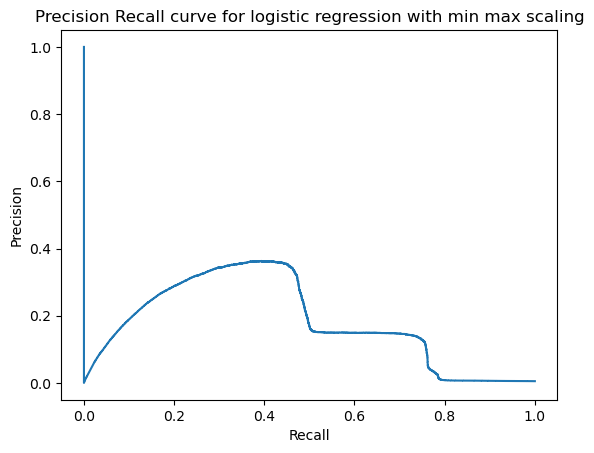

In [209]:
# Calculate precision, recall, and plot the Precision-Recall curve for Logistic Regression with min-max scaling
y_pred_proba_logreg_min_max = logreg_min_max.predict_proba(X_test_min_max)[:,1]
logreg_min_max.predict_proba(X_test_min_max).shape
logreg_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_logreg_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for logistic regression with min max scaling')
plt.ylabel("Precision")

In [210]:
# Calculate and display the Area Under the Curve (AUC) for Logistic Regression with min-max scaling
print("AUC for logistic regression with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_logreg_min_max)  )

AUC for logistic regression with min max scaling: 0.8329095622746522


Text(0, 0.5, 'TPR')

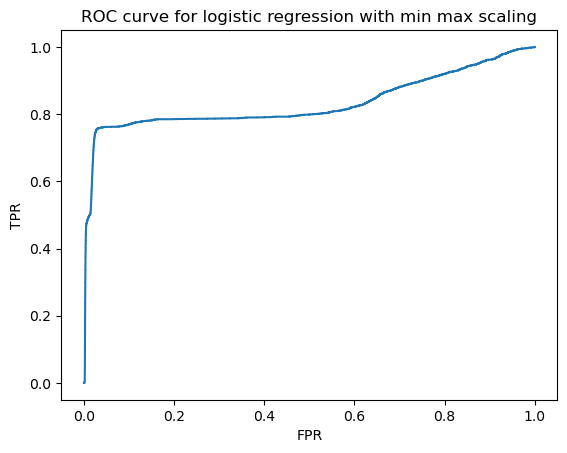

In [211]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for logistic regression with min-max scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_logreg_min_max)
plt.title('ROC curve for logistic regression with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### KNN

In [212]:
# Calculate and display the confusion matrix for KNN with standard scaling
confusion_matrix(y_test_standard,y_test_pred_knn_standard)

array([[530322,  22502],
       [   726,   2169]])

In [213]:
# Calculate and display precision, recall, accuracy, and F1 scores for KNN with standard scaling
print('Precision score for KNN with standard scaling:', precision_score(y_test_standard,y_test_pred_knn_standard))
print('Recall score for KNN with standard scaling:', recall_score(y_test_standard,y_test_pred_knn_standard))
print('Accuracy score for KNN with standard scaling:', accuracy_score(y_test_standard,y_test_pred_knn_standard))
print('F1 score for KNN with standard scaling:', f1_score(y_test_standard,y_test_pred_knn_standard))

Precision score for KNN with standard scaling: 0.08791698755624013
Recall score for KNN with standard scaling: 0.7492227979274612
Accuracy score for KNN with standard scaling: 0.9582018970019021
F1 score for KNN with standard scaling: 0.15736777189291157


In [296]:
ndf_knn_standard = [(recall_score(y_test_standard, y_test_pred_knn_standard), precision_score(y_test_standard, y_test_pred_knn_standard), f1_score(y_test_standard, y_test_pred_knn_standard), accuracy_score(y_test_standard, y_test_pred_knn_standard))]
ndf_knn_standard_score = pd.DataFrame(data = ndf_knn_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_knn_standard_score.insert(0, 'Model', 'KNN Standard')
ndf_knn_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,KNN Standard,0.749223,0.087917,0.157368,0.958202


Text(0, 0.5, 'Precision')

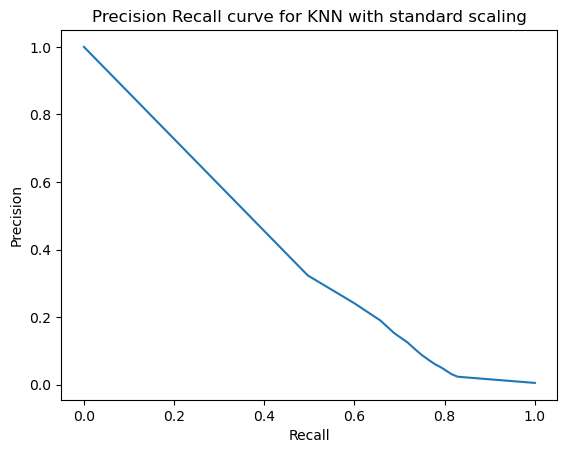

In [214]:
# Calculate precision, recall, and plot the Precision-Recall curve for KNN with standard scaling
y_pred_proba_knn_standard = knn_standard.predict_proba(X_test_standard)[:,1]
knn_standard.predict_proba(X_test_standard).shape
knn_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_knn_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for KNN with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [215]:
# Calculate and display the Area Under the Curve (AUC) for KNN with standard scaling
print("AUC for KNN with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_knn_standard)  )

AUC for KNN with standard scaling: 0.8870282376409053


Text(0, 0.5, 'TPR')

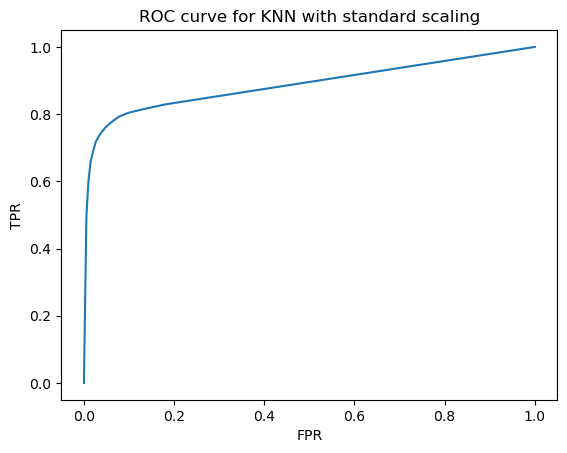

In [216]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for KNN with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_knn_standard)
plt.title('ROC curve for KNN with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [217]:
confusion_matrix(y_test_min_max,y_test_pred_knn_min_max)

array([[524147,  28677],
       [   674,   2221]])

In [218]:
print('Precision score with minmax scaling:', precision_score(y_test_min_max,y_test_pred_knn_min_max))
print('Recall score with minmax scaling:', recall_score(y_test_min_max,y_test_pred_knn_min_max))
print('Accuracy score with minmax scaling:', accuracy_score(y_test_min_max,y_test_pred_knn_min_max))
print('F1 score with minmax scaling:', f1_score(y_test_min_max,y_test_pred_knn_min_max))

Precision score with minmax scaling: 0.07188167518933264
Recall score with minmax scaling: 0.7671848013816925
Accuracy score with minmax scaling: 0.9471837385441203
F1 score with minmax scaling: 0.1314473411653301


In [297]:
ndf_knn_min_max = [(recall_score(y_test_min_max, y_test_pred_knn_min_max), precision_score(y_test_min_max, y_test_pred_knn_min_max), f1_score(y_test_min_max, y_test_pred_knn_min_max), accuracy_score(y_test_min_max, y_test_pred_knn_min_max))]
ndf_knn_min_max_score = pd.DataFrame(data = ndf_knn_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_knn_min_max_score.insert(0, 'Model', 'KNN Min Max')
ndf_knn_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,KNN Min Max,0.767185,0.071882,0.131447,0.947184


Text(0, 0.5, 'Precision')

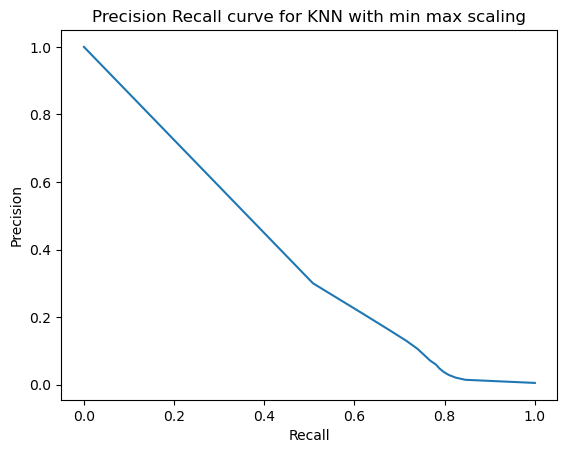

In [219]:
# Calculate precision, recall, and plot the Precision-Recall curve for KNN with min-max scaling
y_pred_proba_knn_min_max = knn_min_max.predict_proba(X_test_min_max)[:,1]
knn_min_max.predict_proba(X_test_min_max).shape
knn_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_knn_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for KNN with min max scaling')
plt.ylabel("Precision")

In [220]:
# Calculate and display the Area Under the Curve (AUC) for KNN with standard scaling
print("AUC for KNN with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_knn_min_max)  )

AUC for KNN with min max scaling: 0.8818000682543494


Text(0, 0.5, 'TPR')

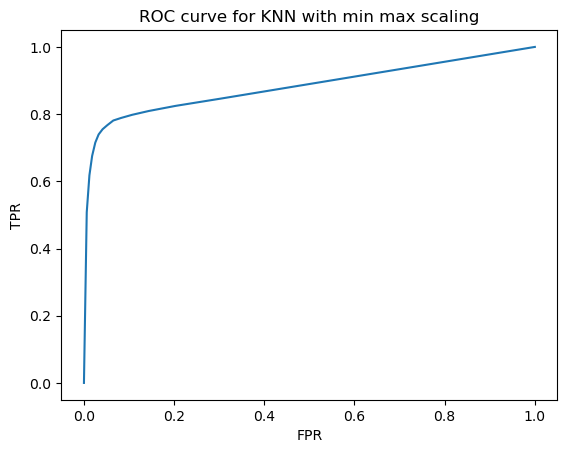

In [221]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for KNN with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_knn_min_max)
plt.title('ROC curve for KNN with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Decision Tree

In [222]:
# Calculate and display the confusion matrix for KNN with standard scaling
confusion_matrix(y_test_standard,y_test_pred_dtc_standard)

array([[487224,  65600],
       [   324,   2571]])

In [223]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Decision Tree with standard scaling:', precision_score(y_test_standard,y_test_pred_dtc_standard))
print('Recall score for Decision Tree with standard scaling:', recall_score(y_test_standard,y_test_pred_dtc_standard))
print('Accuracy score for Decision Tree with standard scaling:', accuracy_score(y_test_standard,y_test_pred_dtc_standard))
print('F1 score for Decision Tree with standard scaling:', f1_score(y_test_standard,y_test_pred_dtc_standard))

Precision score for Decision Tree with standard scaling: 0.0377139839521204
Recall score for Decision Tree with standard scaling: 0.8880829015544042
Accuracy score for Decision Tree with standard scaling: 0.8813717004457289
F1 score for Decision Tree with standard scaling: 0.0723552753778178


In [316]:
ndf_dt_standard = [(recall_score(y_test_standard, y_test_pred_dtc_standard), precision_score(y_test_standard, y_test_pred_dtc_standard), f1_score(y_test_standard, y_test_pred_dtc_standard), accuracy_score(y_test_standard, y_test_pred_dtc_standard))]
ndf_dt_standard_score = pd.DataFrame(data = ndf_dt_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_dt_standard_score.insert(0, 'Model', 'Decision Tree Standard')
ndf_dt_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Decision Tree Standard,0.888083,0.037714,0.072355,0.881372


Text(0, 0.5, 'Precision')

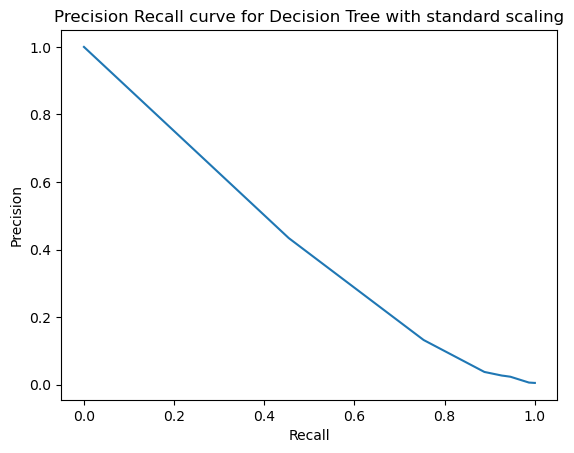

In [224]:
# Calculate precision, recall, and plot the Precision-Recall curve for KNN with standard scaling
y_pred_proba_dtc_standard = dtc_standard.predict_proba(X_test_standard)[:,1]
dtc_standard.predict_proba(X_test_standard).shape
dtc_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_dtc_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Decision Tree with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [225]:
# Calculate and display the Area Under the Curve (AUC) for Decision Tree with standard scaling
print("AUC for Decision Tree with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_dtc_standard)  )

AUC for Decision Tree with standard scaling: 0.9429094821084704


Text(0, 0.5, 'TPR')

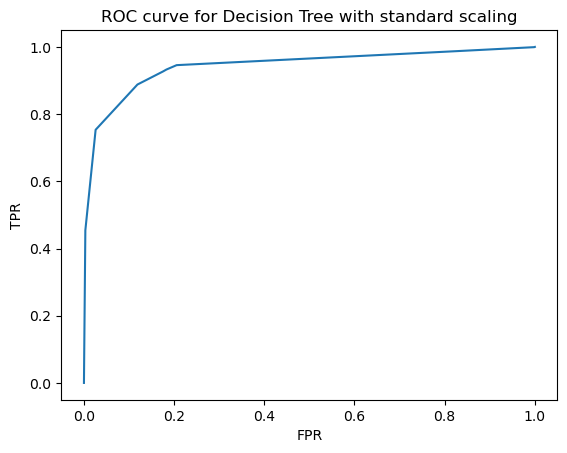

In [226]:
# Plot the ROC curve for Decision Tree with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_dtc_standard)
plt.title('ROC curve for Decision Tree with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [227]:
# Compute the confusion matrix for Decision Tree with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_dtc_min_max)

array([[535671,  17153],
       [   700,   2195]])

In [228]:
# Calculate and print precision, recall, accuracy, and F1 score for Decision Tree with min-max scaling
print('Precision score for Decision Tree with minmax scaling:', precision_score(y_test_min_max,y_test_pred_dtc_min_max))
print('Recall score for Decision Tree with minmax scaling:', recall_score(y_test_min_max,y_test_pred_dtc_min_max))
print('Accuracy score for Decision Tree with minmax scaling:', accuracy_score(y_test_min_max,y_test_pred_dtc_min_max))
print('F1 score for Decision Tree with minmax scaling:', f1_score(y_test_min_max,y_test_pred_dtc_min_max))

Precision score for Decision Tree with minmax scaling: 0.11344841844118256
Recall score for Decision Tree with minmax scaling: 0.7582037996545768
Accuracy score for Decision Tree with minmax scaling: 0.9678740514540622
F1 score for Decision Tree with minmax scaling: 0.19736546329182214


In [332]:
ndf_dt_min_max = [(recall_score(y_test_standard, y_test_pred_dtc_min_max), precision_score(y_test_standard, y_test_pred_dtc_min_max), f1_score(y_test_standard, y_test_pred_dtc_min_max), accuracy_score(y_test_standard, y_test_pred_dtc_min_max))]
ndf_dt_min_max_score = pd.DataFrame(data = ndf_dt_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_dt_min_max_score.insert(0, 'Model', 'Decision Tree Min Max')
ndf_dt_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Decision Tree Min Max,0.758204,0.113448,0.197365,0.967874


Text(0, 0.5, 'Precision')

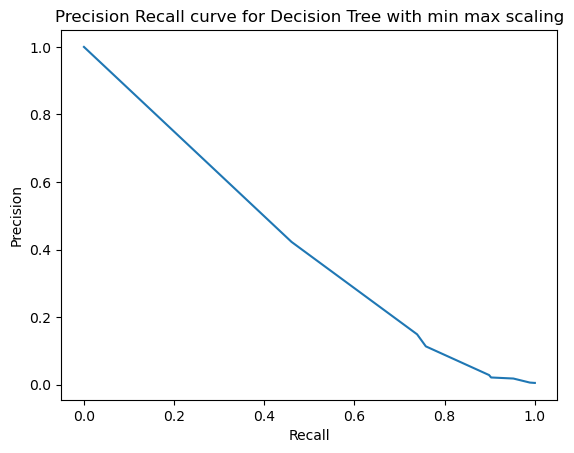

In [229]:
# Calculate and plot the Precision-Recall curve for Decision Tree with min-max scaling
y_pred_proba_dtc_min_max = dtc_min_max.predict_proba(X_test_min_max)[:,1]
dtc_min_max.predict_proba(X_test_min_max).shape
dtc_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_dtc_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for Decision Tree with min max scaling')
plt.ylabel("Precision")

In [230]:
# Calculate and print the AUC (Area Under the Curve) for the Decision Tree with min-max scaling
print("AUC for Decision Tree with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_dtc_min_max)  )

AUC for Decision Tree with min max scaling: 0.9387474941976054


Text(0, 0.5, 'TPR')

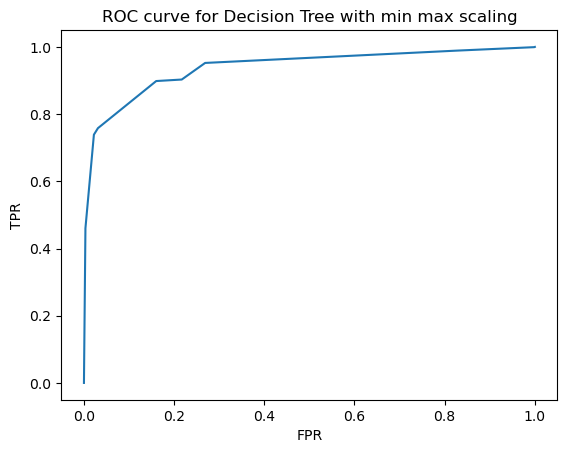

In [231]:
# Plot the ROC curve for the Decision Tree with min-max scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_dtc_min_max)
plt.title('ROC curve for Decision Tree with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Random Forest

In [232]:
# Calculate and display the confusion matrix for Random Forest with standard scaling
confusion_matrix(y_test_standard,y_test_pred_rfc_standard)

array([[536299,  16525],
       [  1338,   1557]])

In [233]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Random Forest with standard scaling:', precision_score(y_test_standard,y_test_pred_rfc_standard))
print('Recall score for Random Forest with standard scaling:', recall_score(y_test_standard,y_test_pred_rfc_standard))
print('Accuracy score for Random Forest with standard scaling:', accuracy_score(y_test_standard,y_test_pred_rfc_standard))
print('F1 score for Random Forest with standard scaling:', f1_score(y_test_standard,y_test_pred_rfc_standard))

Precision score for Random Forest with standard scaling: 0.08610773144563655
Recall score for Random Forest with standard scaling: 0.5378238341968912
Accuracy score for Random Forest with standard scaling: 0.9678560567481047
F1 score for Random Forest with standard scaling: 0.14844830051961674


In [311]:
ndf_rf_standard = [(recall_score(y_test_standard, y_test_pred_rfc_standard), precision_score(y_test_standard, y_test_pred_rfc_standard), f1_score(y_test_standard, y_test_pred_rfc_standard), accuracy_score(y_test_standard, y_test_pred_rfc_standard))]
ndf_rf_standard_score = pd.DataFrame(data = ndf_rf_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_rf_standard_score.insert(0, 'Model', 'Random Forest Standard')
ndf_rf_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Random Forest Standard,0.537824,0.086108,0.148448,0.967856


Text(0, 0.5, 'Precision')

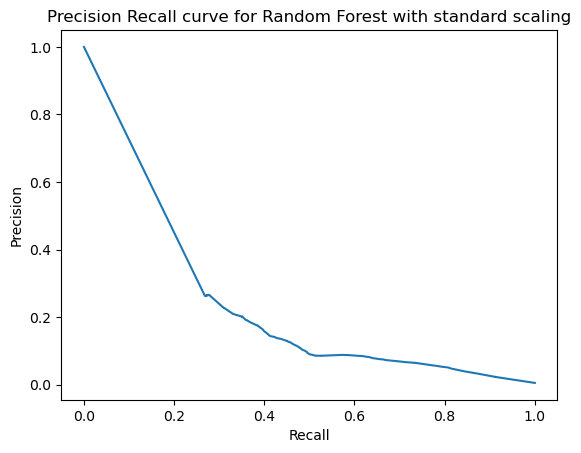

In [234]:
# Calculate precision, recall, and plot the Precision-Recall curve for Random Forest with standard scaling
y_pred_proba_rfc_standard = rfc_standard.predict_proba(X_test_standard)[:,1]
rfc_standard.predict_proba(X_test_standard).shape
rfc_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_rfc_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Random Forest with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [235]:
# Calculate and display the Area Under the Curve (AUC) for Random Forest with standard scaling
print("AUC for Random Forest with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_rfc_standard)  )

AUC for Random Forest with standard scaling: 0.9170253737774783


Text(0, 0.5, 'TPR')

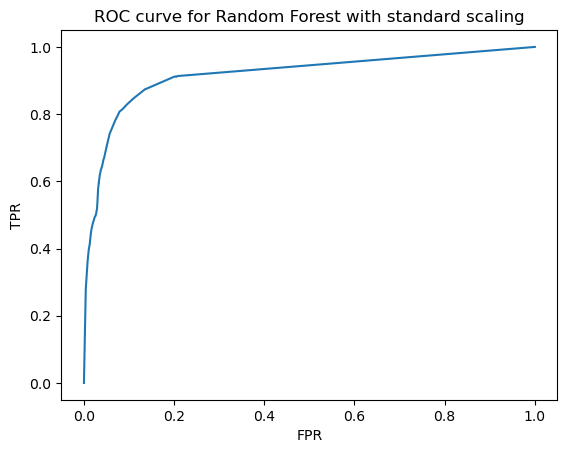

In [236]:
# Plot the ROC curve for Random Forest with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_rfc_standard)
plt.title('ROC curve for Random Forest with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [237]:
# Compute the confusion matrix for Random Forest with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_rfc_min_max)

array([[513333,  39491],
       [  1036,   1859]])

In [238]:
# Calculate and print precision, recall, accuracy, and F1 score for Random Forest with min-max scaling
print('Precision score for Random Forest with minmax scaling:', precision_score(y_test_min_max,y_test_pred_rfc_min_max))
print('Recall score for Random Forest with minmax scaling:', recall_score(y_test_min_max,y_test_pred_rfc_min_max))
print('Accuracy score for Random Forest with minmax scaling:', accuracy_score(y_test_min_max,y_test_pred_rfc_min_max))
print('F1 score for Random Forest with minmax scaling:', f1_score(y_test_min_max,y_test_pred_rfc_min_max))

Precision score for Random Forest with minmax scaling: 0.044957678355501816
Recall score for Random Forest with minmax scaling: 0.6421416234887738
Accuracy score for Random Forest with minmax scaling: 0.9270728551660101
F1 score for Random Forest with minmax scaling: 0.0840320940219234


In [313]:
ndf_rf_min_max = [(recall_score(y_test_standard, y_test_pred_rfc_min_max), precision_score(y_test_standard, y_test_pred_rfc_min_max), f1_score(y_test_standard, y_test_pred_rfc_min_max), accuracy_score(y_test_standard, y_test_pred_rfc_min_max))]
ndf_rf_min_max_score = pd.DataFrame(data = ndf_rf_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_rf_min_max_score.insert(0, 'Model', 'Random Forest Min Max')
ndf_rf_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Random Forest Min Max,0.642142,0.044958,0.084032,0.927073


Text(0, 0.5, 'Precision')

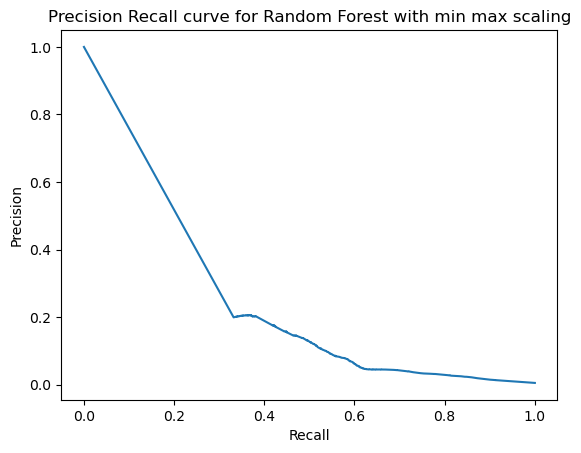

In [239]:
# Calculate and plot the Precision-Recall curve for Random Forest with min-max scaling
y_pred_proba_rfc_min_max = rfc_min_max.predict_proba(X_test_min_max)[:,1]
dtc_min_max.predict_proba(X_test_min_max).shape
dtc_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_rfc_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for Random Forest with min max scaling')
plt.ylabel("Precision")

In [240]:
# Calculate and print the AUC (Area Under the Curve) for the Random Forest with min-max scaling
print("AUC for Random Forest with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_rfc_min_max)  )

AUC for Random Forest with min max scaling: 0.8924793605510453


Text(0, 0.5, 'TPR')

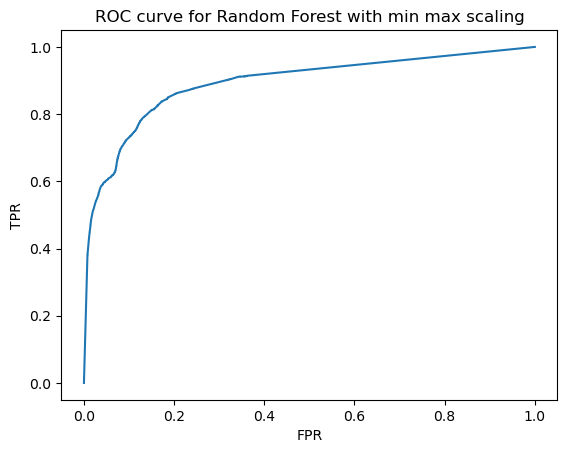

In [241]:
# Plot the ROC curve for the Random Forest with min-max scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_rfc_min_max)
plt.title('ROC curve for Random Forest with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Naive Bayes

In [242]:
# Calculate and display the confusion matrix for Naive Bayes with standard scaling
confusion_matrix(y_test_standard,y_test_pred_cat_nb_standard)

array([[536610,  16214],
       [   696,   2199]])

In [243]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Naive Bayes with standard scaling:', precision_score(y_test_standard,y_test_pred_cat_nb_standard))
print('Recall score for Naive Bayes with standard scaling:', recall_score(y_test_standard,y_test_pred_cat_nb_standard))
print('Accuracy score for Naive Bayes with standard scaling:', accuracy_score(y_test_standard,y_test_pred_cat_nb_standard))
print('F1 score for Naive Bayes with standard scaling:', f1_score(y_test_standard,y_test_pred_cat_nb_standard))

Precision score for Naive Bayes with standard scaling: 0.11942649215228371
Recall score for Naive Bayes with standard scaling: 0.7595854922279792
Accuracy score for Naive Bayes with standard scaling: 0.9695709522258551
F1 score for Naive Bayes with standard scaling: 0.20640135160503095


In [308]:
ndf_nb_standard = [(recall_score(y_test_standard, y_test_pred_cat_nb_standard), precision_score(y_test_standard, y_test_pred_cat_nb_standard), f1_score(y_test_standard, y_test_pred_cat_nb_standard), accuracy_score(y_test_standard, y_test_pred_cat_nb_standard))]
ndf_nb_standard_score = pd.DataFrame(data = ndf_nb_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_nb_standard_score.insert(0, 'Model', 'Naive Bayes Standard')
ndf_nb_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Naive Bayes Standard,0.759585,0.119426,0.206401,0.969571


Text(0, 0.5, 'Precision')

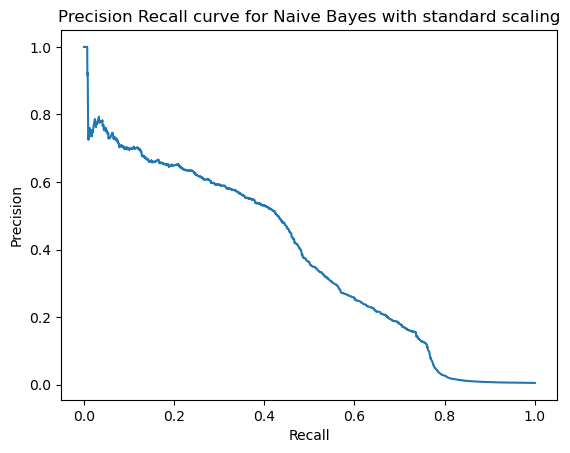

In [244]:
# Calculate precision, recall, and plot the Precision-Recall curve for Naive Bayes with standard scaling
y_pred_proba_cat_nb_standard = cat_nb_standard.predict_proba(X_test_standard)[:,1]
cat_nb_standard.predict_proba(X_test_standard).shape
cat_nb_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_cat_nb_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Naive Bayes with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [245]:
# Calculate and display the Area Under the Curve (AUC) for Naive Bayes with standard scaling
print("AUC for Naive Bayes with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_cat_nb_standard)  )

AUC for Naive Bayes with standard scaling: 0.8721874010653716


Text(0, 0.5, 'TPR')

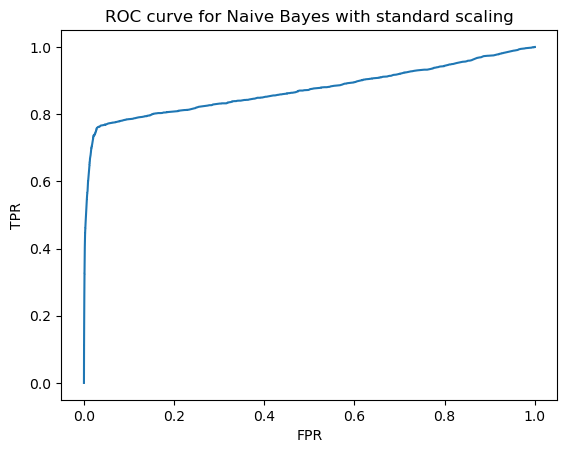

In [246]:
# Plot the ROC curve for Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_cat_nb_standard)
plt.title('ROC curve for Naive Bayes with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [247]:
# Calculate and display the confusion matrix for Naive Bayes with min max scaling
confusion_matrix(y_test_min_max,y_test_pred_cat_nb_min_max)

array([[331219, 221605],
       [  1426,   1469]])

In [248]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for Naive Bayes with min max scaling:', precision_score(y_test_min_max,y_test_pred_cat_nb_min_max))
print('Recall score for Naive Bayes with min max scaling:', recall_score(y_test_min_max,y_test_pred_cat_nb_min_max))
print('Accuracy score for Naive Bayes with min max scaling:', accuracy_score(y_test_min_max,y_test_pred_cat_nb_min_max))
print('F1 score for Naive Bayes with min max scaling:', f1_score(y_test_min_max,y_test_pred_cat_nb_min_max))

Precision score for Naive Bayes with min max scaling: 0.006585258703389906
Recall score for Naive Bayes with min max scaling: 0.507426597582038
Accuracy score for Naive Bayes with min max scaling: 0.5986622735591189
F1 score for Naive Bayes with min max scaling: 0.013001783430470551


In [310]:
ndf_nb_min_max = [(recall_score(y_test_standard, y_test_pred_cat_nb_min_max), precision_score(y_test_standard, y_test_pred_cat_nb_min_max), f1_score(y_test_standard, y_test_pred_cat_nb_min_max), accuracy_score(y_test_standard, y_test_pred_cat_nb_min_max))]
ndf_nb_min_max_score = pd.DataFrame(data = ndf_nb_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_nb_min_max_score.insert(0, 'Model', 'Naive Bayes Min Max')
ndf_nb_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Naive Bayes Min Max,0.507427,0.006585,0.013002,0.598662


Text(0, 0.5, 'Precision')

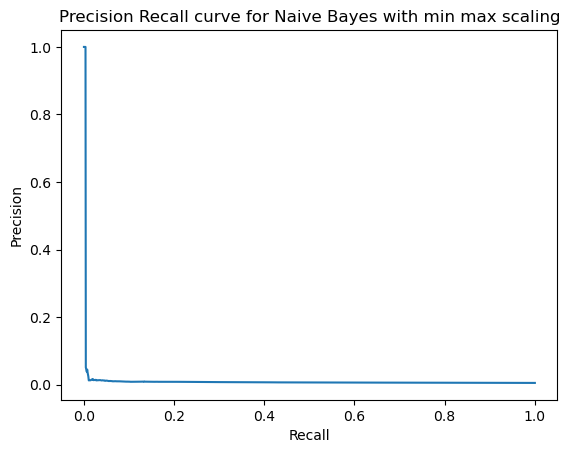

In [249]:
# Calculate precision, recall, and plot the Precision-Recall curve for Naive Bayes with min max scaling
y_pred_proba_cat_nb_min_max = cat_nb_min_max.predict_proba(X_test_min_max)[:,1]
cat_nb_min_max.predict_proba(X_test_min_max).shape
cat_nb_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_cat_nb_min_max)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Naive Bayes with min max scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [250]:
# Calculate and display the Area Under the Curve (AUC) for Naive Bayes with standard scaling
print("AUC for Naive Bayes with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_cat_nb_min_max)  )

AUC for Naive Bayes with min max scaling: 0.5758055604688324


Text(0, 0.5, 'TPR')

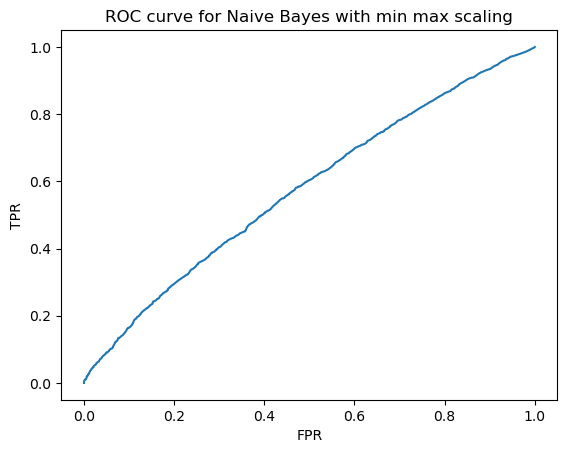

In [251]:
# Plot the ROC curve for Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_cat_nb_min_max)
plt.title('ROC curve for Naive Bayes with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Gaussian Naive Bayes

In [252]:
# Calculate and display the confusion matrix for Gaussian Naive Bayes with standard scaling
confusion_matrix(y_test_standard,y_test_pred_g_nb_standard)

array([[541924,  10900],
       [   912,   1983]])

In [253]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Gaussian Naive Bayes with standard scaling:', precision_score(y_test_standard,y_test_pred_g_nb_standard))
print('Recall score for Gaussian Naive Bayes with standard scaling:', recall_score(y_test_standard,y_test_pred_g_nb_standard))
print('Accuracy score for Gaussian Naive Bayes with standard scaling:', accuracy_score(y_test_standard,y_test_pred_g_nb_standard))
print('F1 score for Gaussian Naive Bayes with standard scaling:', f1_score(y_test_standard,y_test_pred_g_nb_standard))

Precision score for Gaussian Naive Bayes with standard scaling: 0.15392377551812467
Recall score for Gaussian Naive Bayes with standard scaling: 0.6849740932642487
Accuracy score for Gaussian Naive Bayes with standard scaling: 0.9787446533229924
F1 score for Gaussian Naive Bayes with standard scaling: 0.25136265686398784


In [307]:
ndf_gnb_standard = [(recall_score(y_test_standard, y_test_pred_g_nb_standard), precision_score(y_test_standard, y_test_pred_g_nb_standard), f1_score(y_test_standard, y_test_pred_g_nb_standard), accuracy_score(y_test_standard, y_test_pred_g_nb_standard))]
ndf_gnb_standard_score = pd.DataFrame(data = ndf_gnb_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_gnb_standard_score.insert(0, 'Model', 'Gaussian Naive Bayes Standard')
ndf_gnb_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Gaussian Naive Bayes Standard,0.684974,0.153924,0.251363,0.978745


Text(0, 0.5, 'Precision')

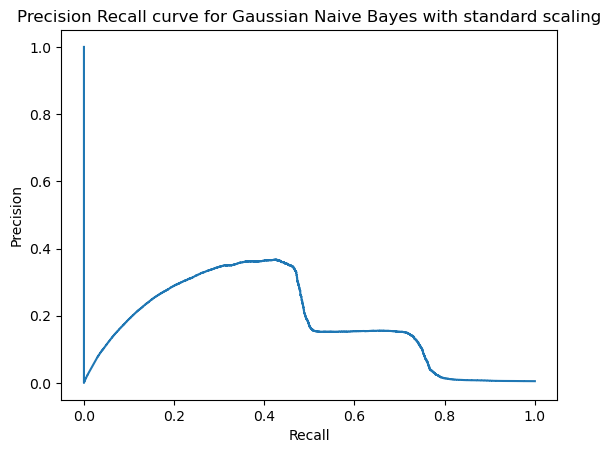

In [254]:
# Calculate precision, recall, and plot the Precision-Recall curve for Gaussian Naive Bayes with standard scaling
y_pred_proba_g_nb_standard = g_nb_standard.predict_proba(X_test_standard)[:,1]
g_nb_standard.predict_proba(X_test_standard).shape
g_nb_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_g_nb_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Gaussian Naive Bayes with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [255]:
# Calculate and display the Area Under the Curve (AUC) for Gaussian Naive Bayes with standard scaling
print("AUC for Gaussian Naive Bayes with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_g_nb_standard) )

AUC for Gaussian Naive Bayes with standard scaling: 0.8482235933284441


Text(0, 0.5, 'TPR')

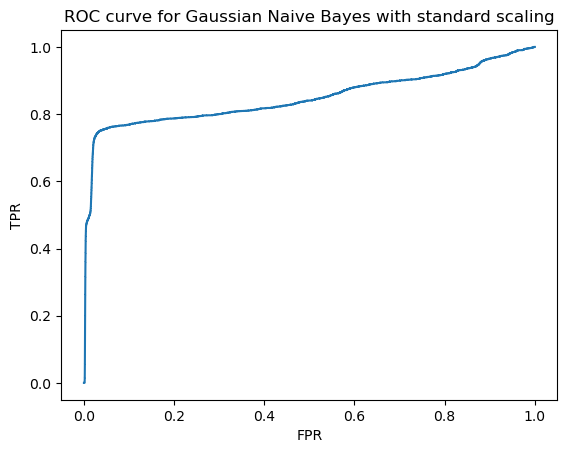

In [256]:
# Plot the ROC curve for Gaussian Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_g_nb_standard)
plt.title('ROC curve for Gaussian Naive Bayes with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [257]:
# Calculate and display the confusion matrix for Gaussian Naive Bayes with min max scaling
confusion_matrix(y_test_min_max,y_test_pred_g_nb_min_max)

array([[541769,  11055],
       [   889,   2006]])

In [258]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for Gaussian Naive Bayes with min max scaling:', precision_score(y_test_min_max,y_test_pred_g_nb_min_max))
print('Recall score for Gaussian Naive Bayes with min max scaling:', recall_score(y_test_min_max,y_test_pred_g_nb_min_max))
print('Accuracy score for Gaussian Naive Bayes with min max scaling:', accuracy_score(y_test_min_max,y_test_pred_g_nb_min_max))
print('F1 score for Gaussian Naive Bayes with min max scaling:', f1_score(y_test_min_max,y_test_pred_g_nb_min_max))

Precision score for Gaussian Naive Bayes with min max scaling: 0.15358701477681647
Recall score for Gaussian Naive Bayes with min max scaling: 0.6929188255613126
Accuracy score for Gaussian Naive Bayes with min max scaling: 0.9785071232043533
F1 score for Gaussian Naive Bayes with min max scaling: 0.2514414640260717


In [306]:
ndf_gnb_min_max = [(recall_score(y_test_standard, y_test_pred_g_nb_min_max), precision_score(y_test_standard, y_test_pred_g_nb_min_max), f1_score(y_test_standard, y_test_pred_g_nb_min_max), accuracy_score(y_test_standard, y_test_pred_g_nb_min_max))]
ndf_gnb_min_max_score = pd.DataFrame(data = ndf_gnb_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_gnb_min_max_score.insert(0, 'Model', 'Gaussian Naive Bayes Min Max')
ndf_gnb_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Gaussian Naive Bayes Min Max,0.692919,0.153587,0.251441,0.978507


Text(0, 0.5, 'Precision')

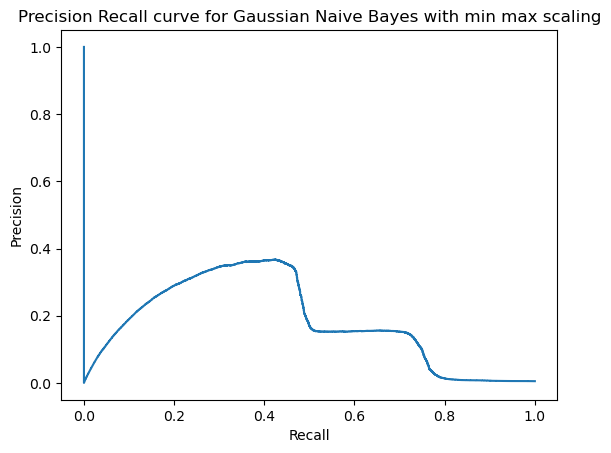

In [259]:
# Calculate precision, recall, and plot the Precision-Recall curve for Gaussian Naive Bayes with min max scaling
y_pred_proba_g_nb_min_max = g_nb_min_max.predict_proba(X_test_min_max)[:,1]
g_nb_min_max.predict_proba(X_test_min_max).shape
g_nb_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_g_nb_min_max)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Gaussian Naive Bayes with min max scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [260]:
# Calculate and display the Area Under the Curve (AUC) for Gaussian Naive Bayes with standard scaling
print("AUC for Gaussian Naive Bayes with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_g_nb_min_max)  )

AUC for Gaussian Naive Bayes with min max scaling: 0.8470720123751091


Text(0, 0.5, 'TPR')

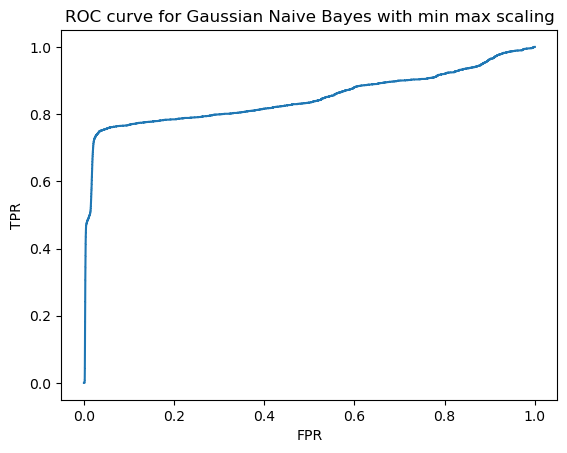

In [261]:
# Plot the ROC curve for Gaussian Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_g_nb_min_max)
plt.title('ROC curve for Gaussian Naive Bayes with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### SVM

In [262]:
# Calculate and display the confusion matrix for SVM with standard scaling
confusion_matrix(y_test_standard,y_test_pred_svc_standard)

array([[177723, 375101],
       [   271,   2624]])

In [263]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for SVM with standard scaling:', precision_score(y_test_standard,y_test_pred_svc_standard))
print('Recall score for SVM with standard scaling:', recall_score(y_test_standard,y_test_pred_svc_standard))
print('Accuracy score for SVM with standard scaling:', accuracy_score(y_test_standard,y_test_pred_svc_standard))
print('F1 score for SVM with standard scaling:', f1_score(y_test_standard,y_test_pred_svc_standard))

Precision score for SVM with standard scaling: 0.006946852869150837
Recall score for SVM with standard scaling: 0.9063903281519862
Accuracy score for SVM with standard scaling: 0.3245291235318569
F1 score for SVM with standard scaling: 0.013788030056224055


In [299]:
ndf_svm_standard = [(recall_score(y_test_standard, y_test_pred_svc_standard), precision_score(y_test_standard, y_test_pred_svc_standard), f1_score(y_test_standard, y_test_pred_svc_standard), accuracy_score(y_test_standard, y_test_pred_svc_standard))]
ndf_svm_standard_score = pd.DataFrame(data = ndf_svm_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_svm_standard_score.insert(0, 'Model', 'SVM Standard')
ndf_svm_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,SVM Standard,0.90639,0.006947,0.013788,0.324529


In [264]:
# Calculate and display the confusion matrix for SVM with min max scaling
confusion_matrix(y_test_min_max,y_test_pred_svc_min_max)

array([[537525,  15299],
       [   757,   2138]])

In [265]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for SVM with min max scaling:', precision_score(y_test_min_max,y_test_pred_svc_min_max))
print('Recall score for SVM with min max scaling:', recall_score(y_test_min_max,y_test_pred_svc_min_max))
print('Accuracy score for SVM with min max scaling:', accuracy_score(y_test_min_max,y_test_pred_svc_min_max))
print('F1 score for SVM with min max scaling:', f1_score(y_test_min_max,y_test_pred_svc_min_max))

Precision score for SVM with min max scaling: 0.12261283477662442
Recall score for SVM with min max scaling: 0.7385146804835924
Accuracy score for SVM with min max scaling: 0.9711077001146263
F1 score for SVM with min max scaling: 0.2103088727129648


In [333]:
ndf_svm_min_max = [(recall_score(y_test_standard, y_test_pred_svc_min_max), precision_score(y_test_standard, y_test_pred_svc_min_max), f1_score(y_test_standard, y_test_pred_svc_min_max), accuracy_score(y_test_standard, y_test_pred_svc_min_max))]
ndf_svm_min_max_score = pd.DataFrame(data = ndf_svm_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_svm_min_max_score.insert(0, 'Model', 'SVM Min Max')
ndf_svm_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,SVM Min Max,0.738515,0.122613,0.210309,0.971108


### Extension - Unsupervised + Supervised

In [266]:
# Calculate and display the confusion matrix for extended model with standard scaling
confusion_matrix(y_test_standard,y_pred_pca_rfc_standard)

array([[523816,  29008],
       [   720,   2175]])

In [267]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for extended model with standard scaling:', precision_score(y_test_standard,y_pred_pca_rfc_standard))
print('Recall score for extended model with standard scaling:', recall_score(y_test_standard,y_pred_pca_rfc_standard))
print('Accuracy score for extended model with standard scaling:', accuracy_score(y_test_standard,y_pred_pca_rfc_standard))
print('F1 score for extended model with standard scaling:', f1_score(y_test_standard,y_pred_pca_rfc_standard))

Precision score for extended model with standard scaling: 0.06974954302023538
Recall score for extended model with standard scaling: 0.7512953367875648
Accuracy score for extended model with standard scaling: 0.9465053381295223
F1 score for extended model with standard scaling: 0.12764833616996302


In [303]:
ndf_pca_rf_standard = [(recall_score(y_test_standard, y_pred_pca_rfc_standard), precision_score(y_test_standard, y_pred_pca_rfc_standard), f1_score(y_test_standard, y_pred_pca_rfc_standard), accuracy_score(y_test_standard, y_pred_pca_rfc_standard))]
ndf_pca_rf_standard_score = pd.DataFrame(data = ndf_pca_rf_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_pca_rf_standard_score.insert(0, 'Model', 'PCA + Random Forest Standard')
ndf_pca_rf_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,PCA + Random Forest Standard,0.751295,0.06975,0.127648,0.946505


Text(0, 0.5, 'Precision')

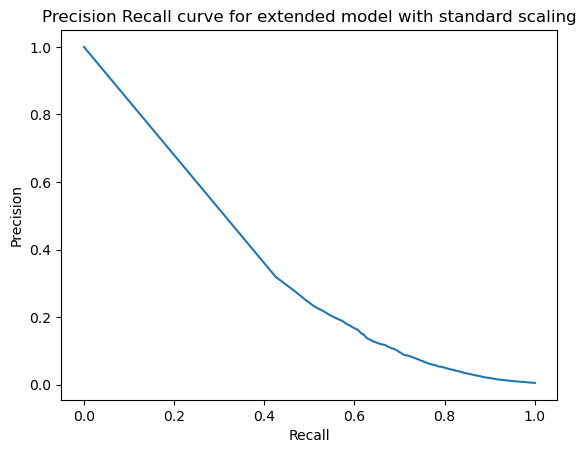

In [272]:
# Calculate precision, recall, and plot the Precision-Recall curve for extended model with standard scaling
y_pred_proba_pca_rfc_standard = pca_rfc_standard.predict_proba(X_test_pca_standard)[:,1]
pca_rfc_standard.predict_proba(X_test_pca_standard).shape
pca_rfc_standard.predict_proba(X_test_pca_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_pca_rfc_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for extended model with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [273]:
# Calculate and display the Area Under the Curve (AUC) for extended model with standard scaling
print("AUC for extended model with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_pca_rfc_standard) )

AUC for extended model with standard scaling: 0.9223007134327803


Text(0, 0.5, 'TPR')

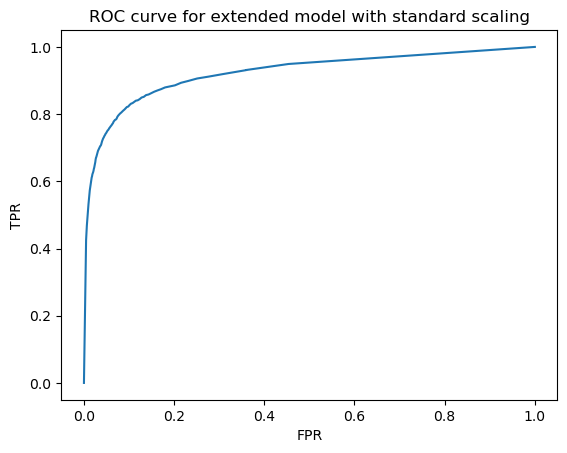

In [274]:
# Plot the ROC curve for extended model with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_pca_rfc_standard)
plt.title('ROC curve for extended model with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [275]:
# Calculate and display the confusion matrix for extended model with min max scaling
confusion_matrix(y_test_min_max,y_pred_pca_rfc_min_max)

array([[489712,  63112],
       [   998,   1897]])

In [276]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for extended model with min max scaling:', precision_score(y_test_min_max,y_pred_pca_rfc_min_max))
print('Recall score for extended model with min max scaling:', recall_score(y_test_min_max,y_pred_pca_rfc_min_max))
print('Accuracy score for extended model with min max scaling:', accuracy_score(y_test_min_max,y_pred_pca_rfc_min_max))
print('F1 score for extended model with min max scaling:', f1_score(y_test_min_max,y_pred_pca_rfc_min_max))

Precision score for extended model with min max scaling: 0.029180574997308063
Recall score for extended model with min max scaling: 0.6552677029360967
Accuracy score for extended model with min max scaling: 0.8846359401064207
F1 score for extended model with min max scaling: 0.05587299717247879


In [334]:
ndf_pca_rf_min_max = [(recall_score(y_test_standard, y_pred_pca_rfc_min_max), precision_score(y_test_standard, y_pred_pca_rfc_min_max), f1_score(y_test_standard, y_pred_pca_rfc_min_max), accuracy_score(y_test_standard, y_pred_pca_rfc_min_max))]
ndf_pca_rf_min_max_score = pd.DataFrame(data = ndf_pca_rf_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_pca_rf_min_max_score.insert(0, 'Model', 'PCA + Random Forest Min Max')
ndf_pca_rf_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,PCA + Random Forest Min Max,0.655268,0.029181,0.055873,0.884636


Text(0, 0.5, 'Precision')

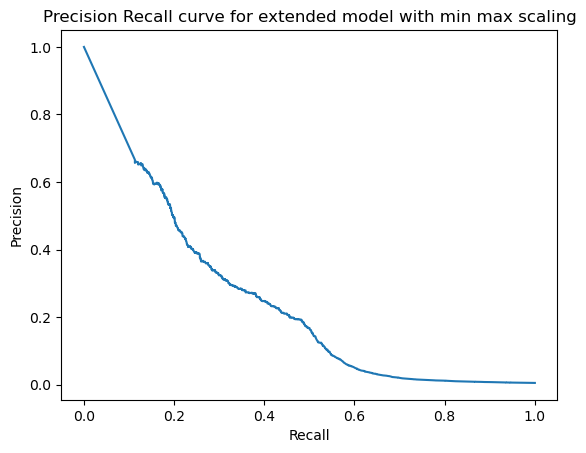

In [277]:
# Calculate precision, recall, and plot the Precision-Recall curve for extended model with min max scaling
y_pred_proba_pca_rfc_min_max = pca_rfc_min_max.predict_proba(X_test_pca_min_max)[:,1]
pca_rfc_min_max.predict_proba(X_test_pca_min_max).shape
pca_rfc_min_max.predict_proba(X_test_pca_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_pca_rfc_min_max)
plt.plot(recall, precision)
plt.title('Precision Recall curve for extended model with min max scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [278]:
# Calculate and display the Area Under the Curve (AUC) for extended model with standard scaling
print("AUC for extended model with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_pca_rfc_min_max)  )

AUC for extended model with min max scaling: 0.8288258107462773


Text(0, 0.5, 'TPR')

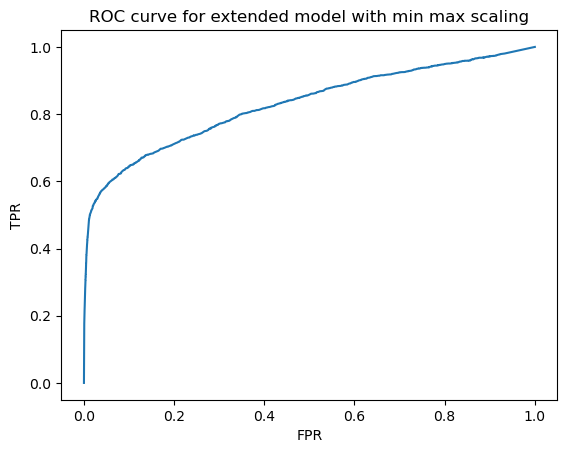

In [279]:
# Plot the ROC curve for extended model with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_pca_rfc_min_max)
plt.title('ROC curve for extended model with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [353]:
predictions = pd.concat([ndf_lr_standard_score, ndf_lr_min_max_score, ndf_knn_standard_score, ndf_knn_min_max_score, ndf_dt_standard_score, ndf_dt_min_max_score, ndf_rf_standard_score, ndf_rf_min_max_score, ndf_nb_standard_score, ndf_nb_min_max_score, ndf_gnb_standard_score, ndf_gnb_min_max_score, ndf_svm_standard_score, ndf_svm_min_max_score, ndf_pca_rf_standard_score, ndf_pca_rf_min_max_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Accuracy'], ascending=False)
#predictions

,Model,Recall,Precision,F1 Score,Accuracy
10,Gaussian Naive Bayes Standard,0.684974,0.153924,0.251363,0.978745
11,Gaussian Naive Bayes Min Max,0.692919,0.153587,0.251441,0.978507
13,SVM Min Max,0.738515,0.122613,0.210309,0.971108
8,Naive Bayes Standard,0.759585,0.119426,0.206401,0.969571
5,Decision Tree Min Max,0.758204,0.113448,0.197365,0.967874
6,Random Forest Standard,0.537824,0.086108,0.148448,0.967856
2,KNN Standard,0.749223,0.087917,0.157368,0.958202
1,Logistic Regression Min Max,0.761313,0.082876,0.149479,0.954867
0,Logistic Regression Standard,0.761313,0.079616,0.144156,0.952908
3,KNN Min Max,0.767185,0.071882,0.131447,0.947184
